importing modules
Loading data...
File loaded successfully!

Data types of UK_Starts columns:
Region or Country Name    object
Local Authority Code      object
Local Authority Name      object
2009-2010                 object
2010-2011                 object
2011-2012                 object
2012-2013                 object
2013-2014                 object
2014-2015                 object
2015-2016                 object
2016-2017                 object
2017-2018                 object
2018-2019                 object
2019-2020                 object
2020-2021                 object
2021-2022                 object
2022-2023                 object
2023-2024                 object
dtype: object

Data types of UK_Completions columns:
Region or Country Name    object
Local Authority Code      object
Local Authority Name      object
2009-2010                 object
2010-2011                 object
2011-2012                 object
2012-2013                 object
2013-2014                 ob

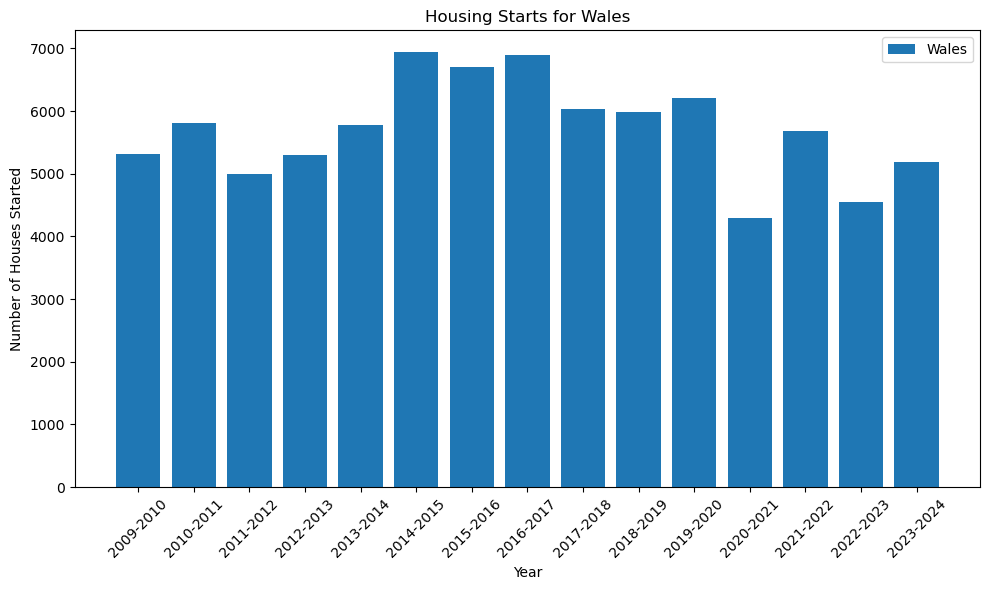

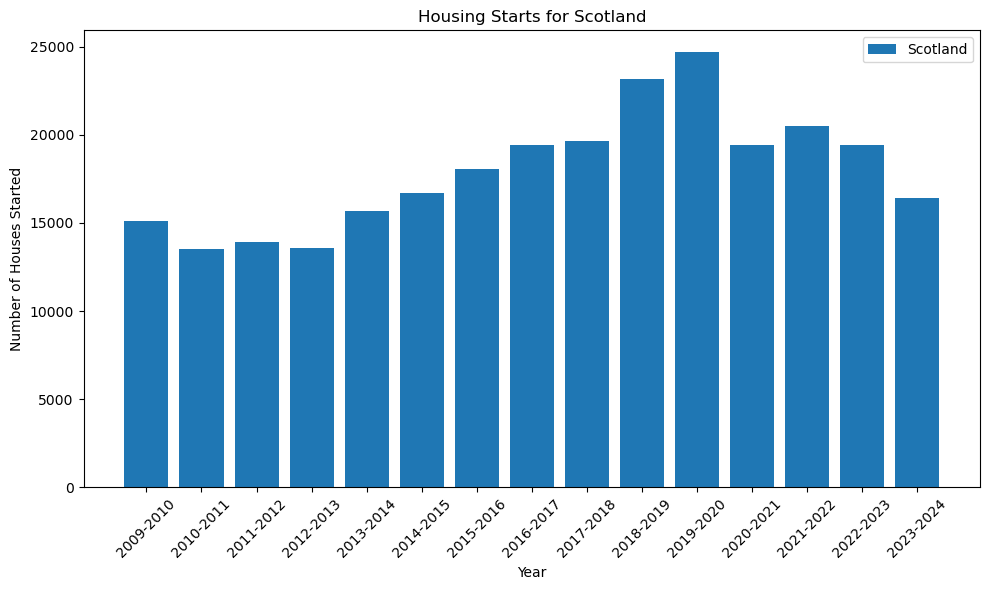

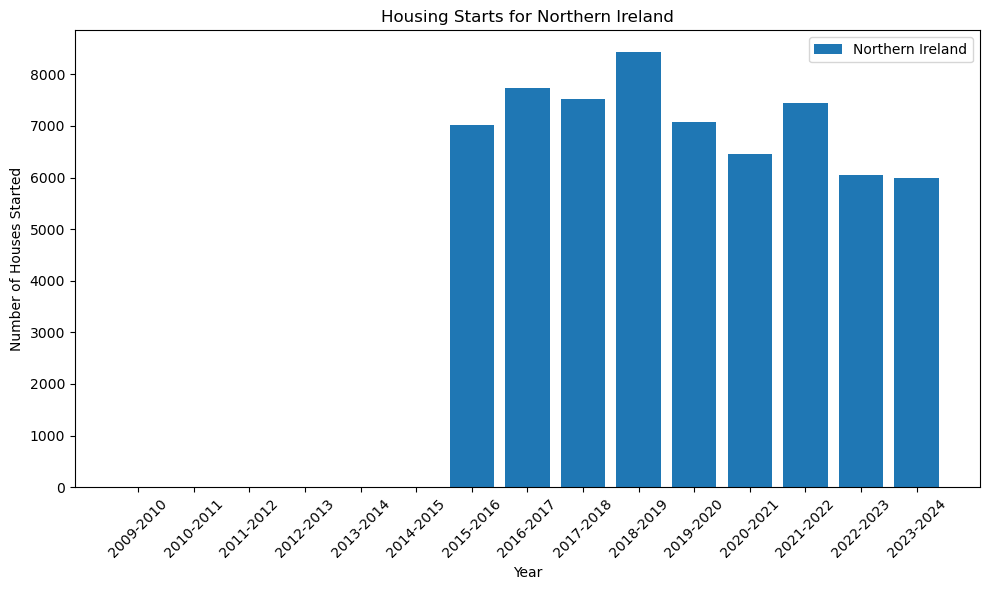

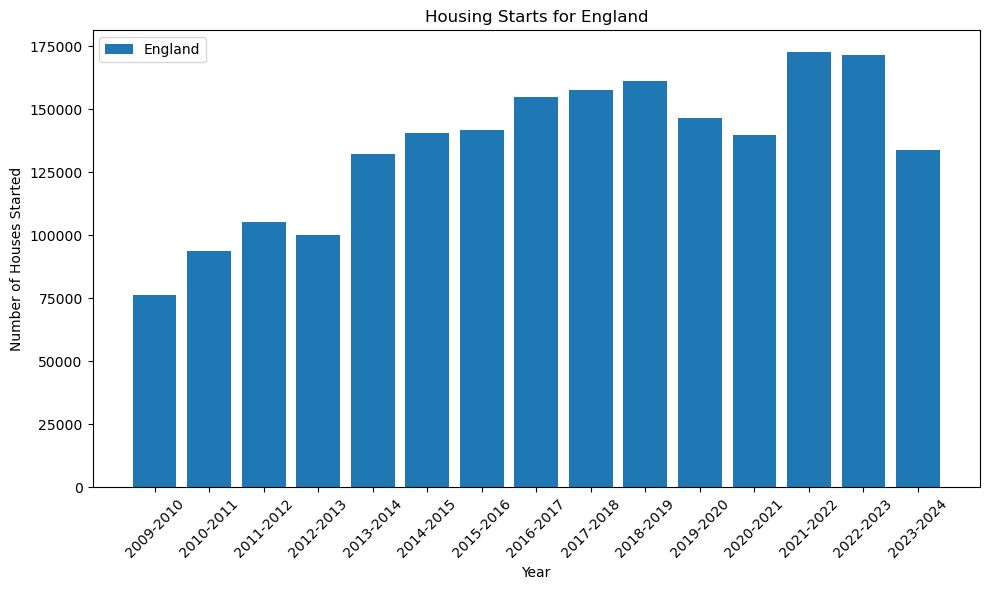

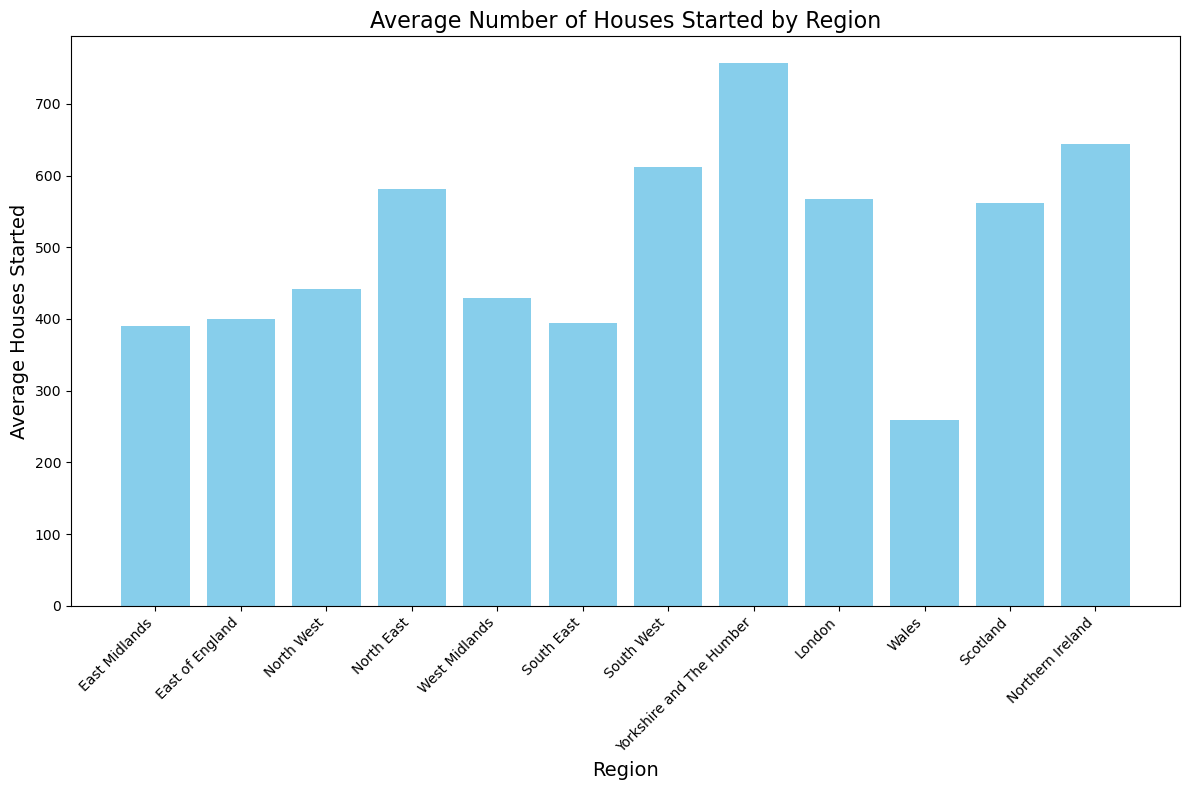

                      Region  Average Houses Completed
0              East Midlands                391.280799
1            East of England                404.431061
2                 North West                432.830357
3                 North East                561.788889
4              West Midlands                433.588331
5                 South East                403.220098
6                 South West                632.602229
7   Yorkshire and The Humber                767.425397
8                     London                616.055556
9                      Wales                265.212121
10                  Scotland                566.187500
11          Northern Ireland                607.171717
{'Wales':   Local Authority Name  2009-2010  2010-2011  2011-2012  2012-2013  2013-2014  \
      Isle of Anglesey      150.0      110.0       70.0      130.0       80.0   
               Gwynedd      150.0      170.0      120.0      160.0      130.0   
                 Conwy      200.

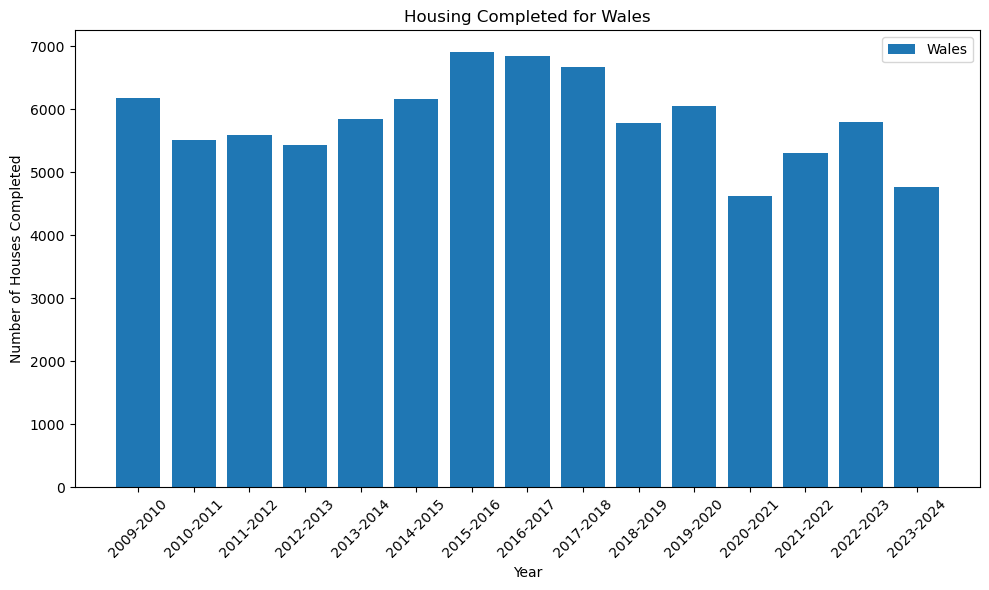

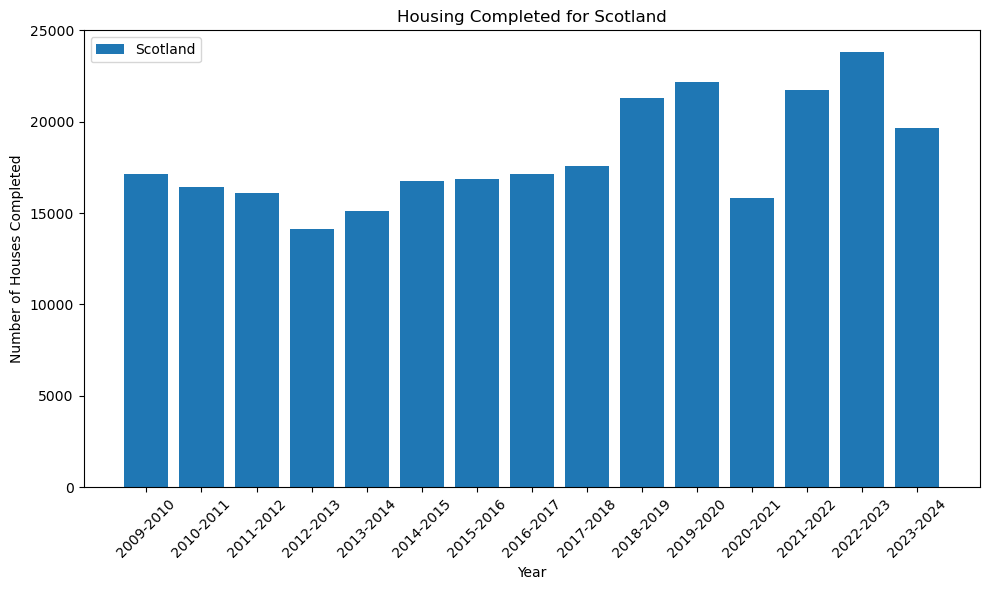

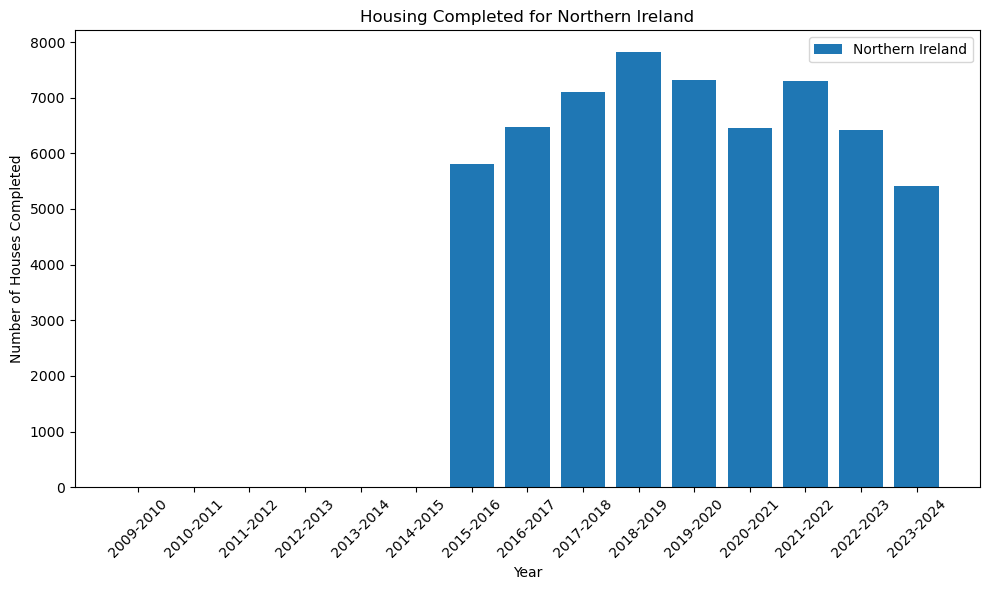

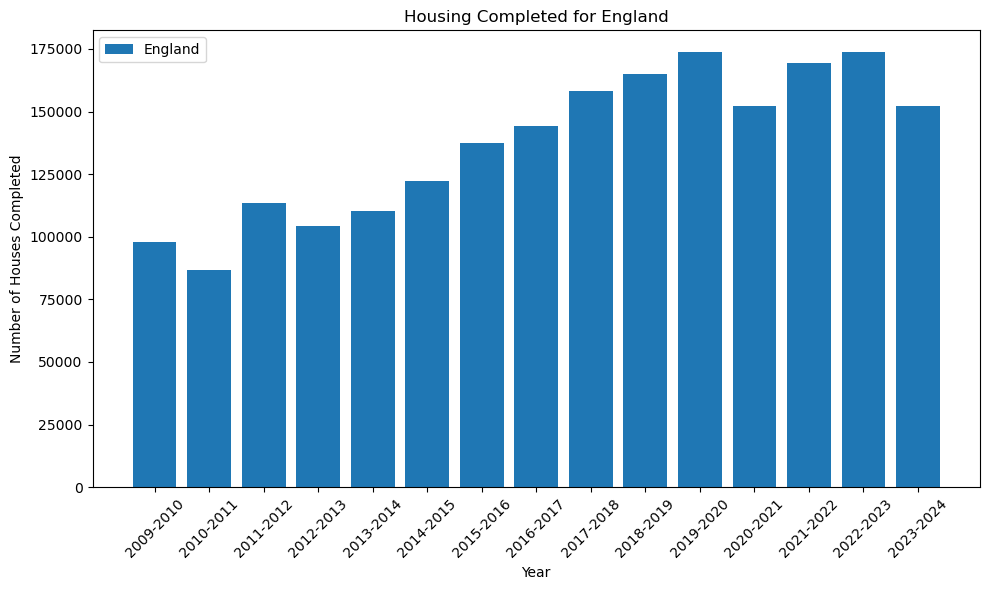

In [1]:
#import data from datasets
%run uk_local_authorities_housing_project_completed.ipynb

#import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np

In [4]:
#global variables

# Define the columns representing the years
year_columns = ['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014',
                '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019',
                '2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']


# Convert year_columns to single-digit years by extracting the first four characters of each element
year_columns_single = [year[:4] for year in year_columns]

print(year_columns_single)

if len(year_columns) == len(year_columns_single):
    print("True")
else:
    print(f"They are not of equal length: Length of year_columns is {len(year_cloumns)} while Length of year_columns_single is {len(year_columns_single)}")




['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
True


In [6]:
import numpy as np
import pandas as pd

def group_housing_data_by_region(uk_local_housing_completed, uk_local_housing_starts, year_columns):
    try:
        
        # Ensure all year columns are numeric and handle missing values (NaN) by filling with the column mean
        uk_local_housing_completed[year_columns] = uk_local_housing_completed[year_columns].apply(pd.to_numeric, errors='coerce')
        uk_local_housing_starts[year_columns] = uk_local_housing_starts[year_columns].apply(pd.to_numeric, errors='coerce')
        uk_local_housing_completed[year_columns] = uk_local_housing_completed[year_columns].fillna(uk_local_housing_completed[year_columns].mean())
        uk_local_housing_starts[year_columns] = uk_local_housing_starts[year_columns].fillna(uk_local_housing_starts[year_columns].mean())
    
        # Create dictionaries to store the grouped regional data for completed and started houses
        region_trends_completed = {}
        region_trends_started = {}

        # Loop through each region and calculate averages for houses started and completed
        for region in uk_local_housing_completed["Region or Country Name"].unique():
            # Filter data for the current region
            region_df_completed = uk_local_housing_completed[uk_local_housing_completed["Region or Country Name"] == region]
            region_df_started = uk_local_housing_starts[uk_local_housing_starts["Region or Country Name"] == region]

            # Check if data exists for both started and completed houses in the region
            if not region_df_completed.empty and not region_df_started.empty:
                # Calculate the average number of houses started and completed for each year
                houses_started_regional_data = region_df_started[year_columns].mean(axis=0).values
                houses_completed_regional_data = region_df_completed[year_columns].mean(axis=0).values

                # Store data in dictionaries for easy access later
                region_trends_started[region] = houses_started_regional_data
                region_trends_completed[region] = houses_completed_regional_data
            else:
                print(f"No data available for {region}")

        # Create DataFrames with years as the index
        regional_grouping_started_df = pd.DataFrame(region_trends_started, index=year_columns)
        regional_grouping_completed_df = pd.DataFrame(region_trends_completed, index=year_columns)

        return regional_grouping_started_df, regional_grouping_completed_df

    except Exception as e:
        print(f"Operation Failed: {e}")

# Example usage
# Ensure that `uk_local_housing_completed` and `uk_local_housing_starts` have "Region or Country Name" and yearly columns.

starts_by_region, completed_by_region = group_housing_data_by_region(uk_local_housing_completed, uk_local_housing_starts, year_columns)


In [7]:
starts_by_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2009-2010 to 2023-2024
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   North East                15 non-null     float64
 1   North West                15 non-null     float64
 2   Yorkshire and The Humber  15 non-null     float64
 3   East Midlands             15 non-null     float64
 4   West Midlands             15 non-null     float64
 5   East of England           15 non-null     float64
 6   London                    15 non-null     float64
 7   South East                15 non-null     float64
 8   South West                15 non-null     float64
 9   Northern Ireland          15 non-null     float64
 10  Scotland                  15 non-null     float64
 11  Wales                     15 non-null     float64
dtypes: float64(12)
memory usage: 1.5+ KB


In [19]:
completed_by_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2009-2010 to 2023-2024
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   North East                15 non-null     float64
 1   North West                15 non-null     float64
 2   Yorkshire and The Humber  15 non-null     float64
 3   East Midlands             15 non-null     float64
 4   West Midlands             15 non-null     float64
 5   East of England           15 non-null     float64
 6   London                    15 non-null     float64
 7   South East                15 non-null     float64
 8   South West                15 non-null     float64
 9   Northern Ireland          15 non-null     float64
 10  Scotland                  15 non-null     float64
 11  Wales                     15 non-null     float64
dtypes: float64(12)
memory usage: 1.5+ KB


In [29]:
import pandas as pd

def search_by_region(completed_by_region, starts_by_region, region_name):
    """
    Search for regional data directly within the column names of completed and started datasets.

    Args:
    completed_by_region (DataFrame): DataFrame of completed houses by region.
    starts_by_region (DataFrame): DataFrame of started houses by region.
    region_name (str): The name of the region to search for.

    Returns:
    DataFrame with the regional data for houses started and completed.
    """
    try:
        # Select the relevant columns for the region
        region_completed = completed_by_region.copy()
        region_started = starts_by_region.copy()

        # Check if the region exists in both DataFrames' columns
        if region_name in region_completed.columns and region_name in region_started.columns:
            # Create a DataFrame to combine both completed and started data for the region
            regional_data = pd.DataFrame({
                #'Year': completed_by_region.index,  # Assuming the index is the year
                f'{region_name}_Completed': region_completed[region_name],
                f'{region_name}_Started': region_started[region_name]
            })
            regional_data.reset_index()
            return regional_data
        else:
            print(f"No data found for the region: {region_name}")
            return None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Prompt for user input
region_to_search = input("Enter the Region to search: ")

# Search and display results
result = search_by_region(completed_by_region, starts_by_region, region_to_search)
if result is not None:
    print(result)
else:
    print("No matching data found.")


Enter the Region to search: London
           London_Completed  London_Started
2009-2010        574.169175      470.993210
2010-2011        489.177489      571.113709
2011-2012        621.661350      603.636364
2012-2013        557.272727      523.333333
2013-2014        555.399528      673.743778
2014-2015        556.363636      721.606847
2015-2016        733.939394      666.060606
2016-2017        691.515152      498.181818
2017-2018        746.652277      650.445633
2018-2019        590.909091      477.443711
2019-2020        685.289487      399.804170
2020-2021        632.403140      453.728370
2021-2022        555.663037      550.702862
2022-2023        652.646634      654.910104
2023-2024        458.409724      445.713805


In [10]:
def average_houses_project_summary(houses_started_dataframe, houses_completed_dataframe):
    """
    Function to print regional information for average houses started and completed across the UK.
    
    Args:
    houses_started_dataframe (DataFrame): Dataframe of houses started.
    houses_completed_dataframe (DataFrame): Dataframe of houses completed.
    
    Output:
    DataFrame with summary of both completed and started houses by region.
    """
    
    # Initialize a dictionary to store the regional summary
    regional_summary = {
        'Region': [],  # To store region names
        'Average Houses Started': [],  # To store average houses started
        'Average Houses Completed': []  # To store average houses completed
    }
    
    try:
        # Iterate through each region in the houses_started_dataframe
        for idx, row in houses_started_dataframe.iterrows():
            region = row['Region']
            avg_started = row['Average Houses Started']
            
            # Find the corresponding row in houses_completed_dataframe
            completed_row = houses_completed_dataframe[houses_completed_dataframe['Region'] == region]
            
            # If the region exists in both dataframes, append the values to the summary
            if not completed_row.empty:
                avg_completed = completed_row['Average Houses Completed'].values[0]
                regional_summary['Region'].append(region)
                regional_summary['Average Houses Started'].append(avg_started)
                regional_summary['Average Houses Completed'].append(avg_completed)

        # Convert the summary dictionary to a DataFrame for easy viewing
        regional_summary_df = pd.DataFrame(regional_summary)
        
        return regional_summary_df

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Call the function
summary_df = average_houses_project_summary(average_houses_by_region_df, average_houses_completed_by_region_df)

summary_df


,Region,Average Houses Started,Average Houses Completed
0,East Midlands,390.611739,391.280799
1,East of England,399.424086,404.431061
2,North West,441.997047,432.830357
3,North East,581.555556,561.788889
4,West Midlands,429.475362,433.588331
5,South East,393.896893,403.220098
6,South West,612.084271,632.602229
7,Yorkshire and The Humber,756.174603,767.425397
8,London,567.081134,616.055556
9,Wales,259.666667,265.212121


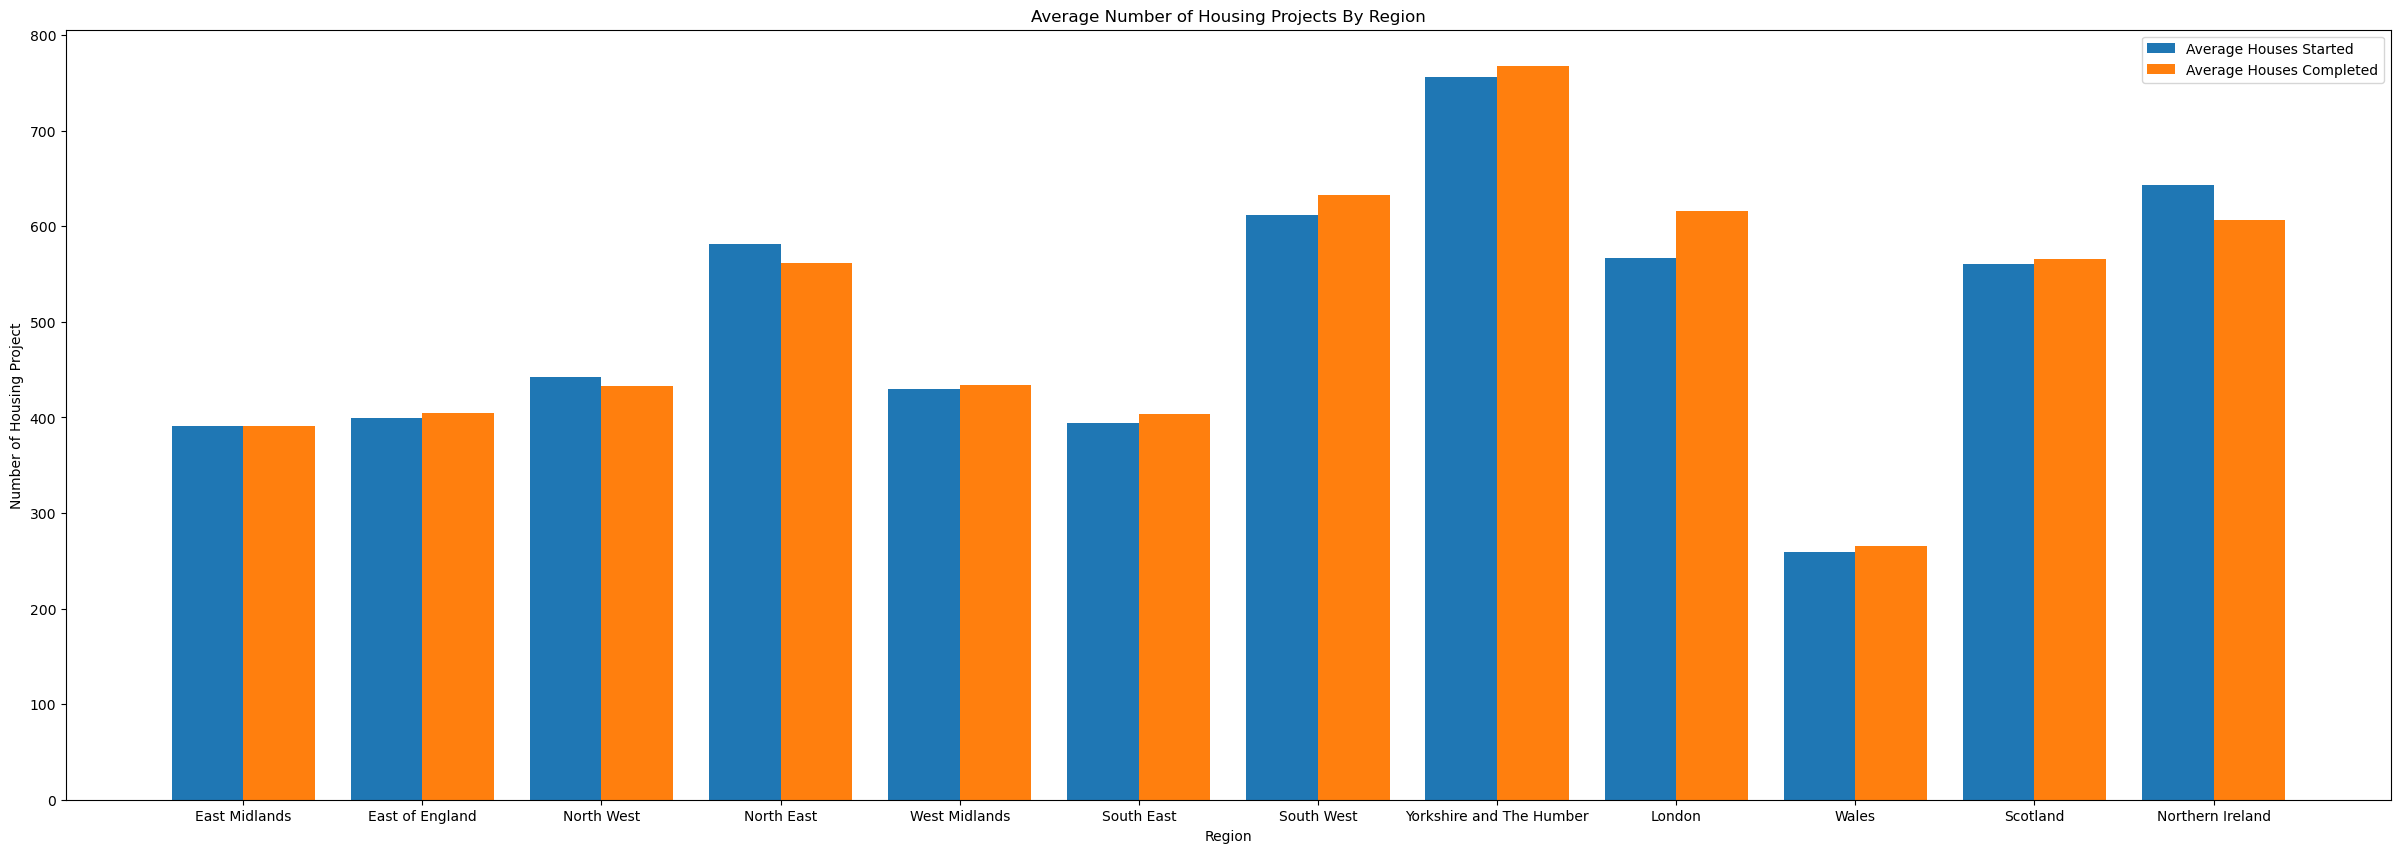

In [11]:

def visualize_data_for_average_house_summary_by_region(data):
    try:
        """
        function to visualize Uk local authority housing project by region
        """
        X = data["Region"]
        Y = data['Average Houses Started']
        Z = data['Average Houses Completed']
        X_axis = np.arange(len(X))
        plt.figure(figsize=(30, 10))
        
        plt.bar(X_axis - 0.2, Y, 0.4, label='Average Houses Started')
        plt.bar(X_axis + 0.2, Z, 0.4, label='Average Houses Completed')
        
        plt.xticks(X_axis, X)
        plt.xlabel("Region")
        plt.ylabel("Number of Housing Project")
        plt.title("Average Number of Housing Projects By Region")
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Operation failed: {e}")

visualize_data_for_average_house_summary_by_region(summary_df)

Mean houses started (2009-2023): 163124.66666666666
Mean houses completed (2009-2023): 165409.33333333334
Standard deviation (started): 35035.48280298268
Standard deviation (completed): 34885.001989530174
Pearson correlation between houses started and completed: 0.9117934251506127
Paired t-test: t-stat = -0.6025689712437574, p-value = 0.5564305457516746


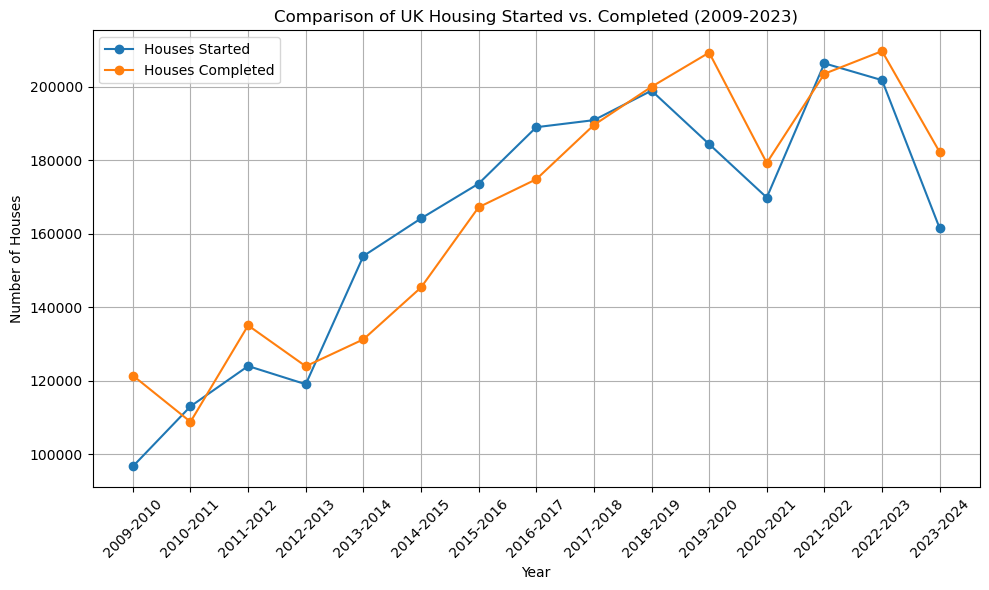

In [12]:


def statictical_analysis_of_uk_local_housing_project(permanent_housing_started_by_country_df, permanent_housing_completed_by_country_df):
    """
    Function to perform statistical analysis on UK housing started and completed data.
    
    """
    try:
        # Aggregate the data by year (sum across regions)
        housing_started_by_year = permanent_housing_started_by_country_df.sum(axis=1)
        housing_completed_by_year = permanent_housing_completed_by_country_df.sum(axis=1)

        # Calculate mean and standard deviation
        """
        Mean and standard deviations: These give insight into the central tendency and spread of the data.
        """
        #Average number of houses started vs. completed.
        mean_started = housing_started_by_year.mean()
        mean_completed = housing_completed_by_year.mean()

        # Calculate standard deviations
        # Measure the variability in housing starts and completions over the years
        std_started = housing_started_by_year.std()
        std_completed = housing_completed_by_year.std()

        # Calculate Pearson correlation coefficient
        """
        Measures how closely related the trends are for housing starts and completions.
        A value close to 1 means a strong positive correlation, 
        while a value close to -1 indicates a strong negative correlation.
        Measure the relationship between housing starts and completions using Pearson correlation coefficient
        
        """
        correlation, _ = stats.pearsonr(housing_started_by_year, housing_completed_by_year)

        # Perform paired t-test
        """ Tests if there’s a significant difference between the number of houses started and completed over the years.
        The null hypothesis is that there is no difference. A low p-value (< 0.05) would indicate a significant difference.
        
        """
        # Perform a paired t-test to see if there is a statistically significant difference between the two datasets over the years
        t_stat, p_value = stats.ttest_rel(housing_started_by_year, housing_completed_by_year)

        # Print results
        print(f"Mean houses started (2009-2023): {mean_started}")
        print(f"Mean houses completed (2009-2023): {mean_completed}")
        print(f"Standard deviation (started): {std_started}")
        print(f"Standard deviation (completed): {std_completed}")
        print(f"Pearson correlation between houses started and completed: {correlation}")
        print(f"Paired t-test: t-stat = {t_stat}, p-value = {p_value}")

        # Visualization
        plt.figure(figsize=(10, 6))
        plt.plot(years, housing_started_by_year, label="Houses Started", marker='o')
        plt.plot(years, housing_completed_by_year, label="Houses Completed", marker='o')
        plt.xlabel("Year")
        plt.ylabel("Number of Houses")
        plt.title("Comparison of UK Housing Started vs. Completed (2009-2023)")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Operation failed: {e}")




statictical_analysis_of_uk_local_housing_project(permanent_housing_started_by_country_df, permanent_housing_completed_by_country_df)

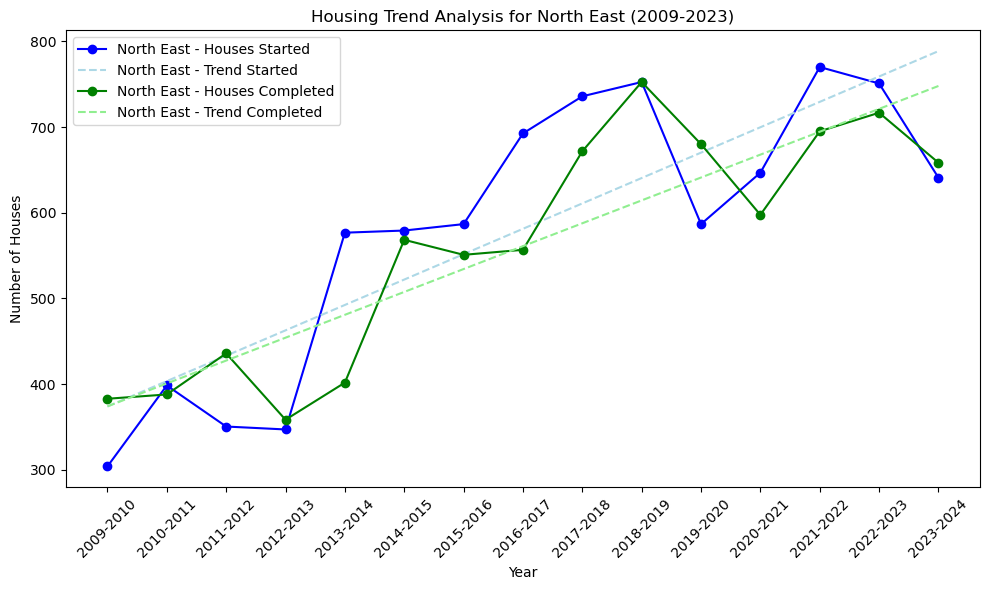

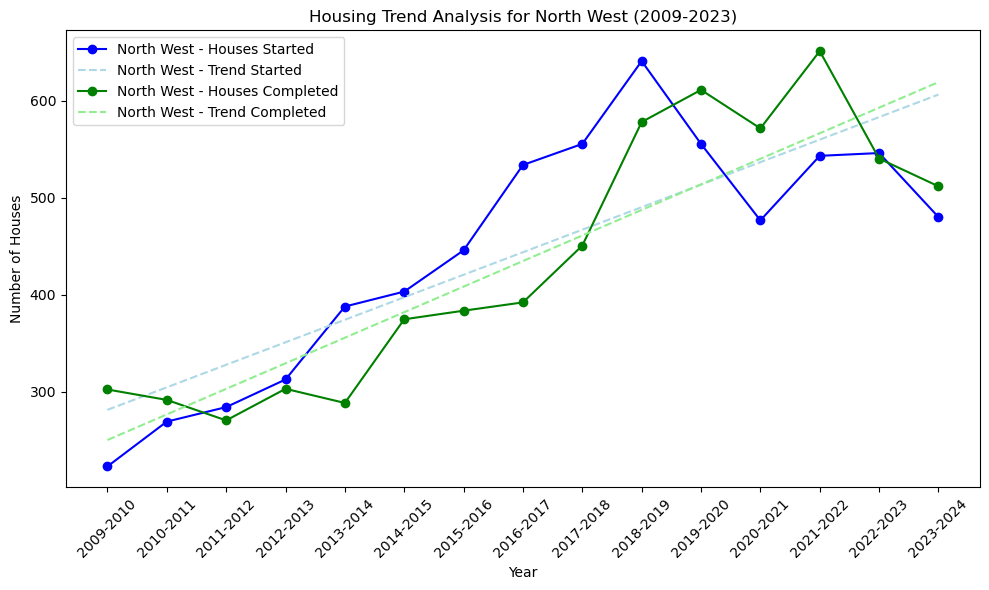

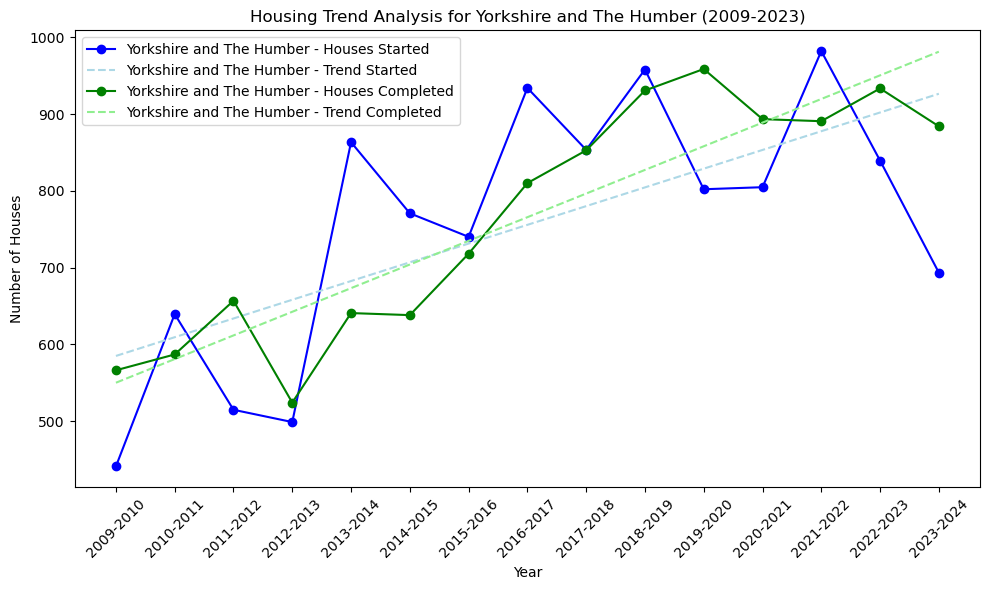

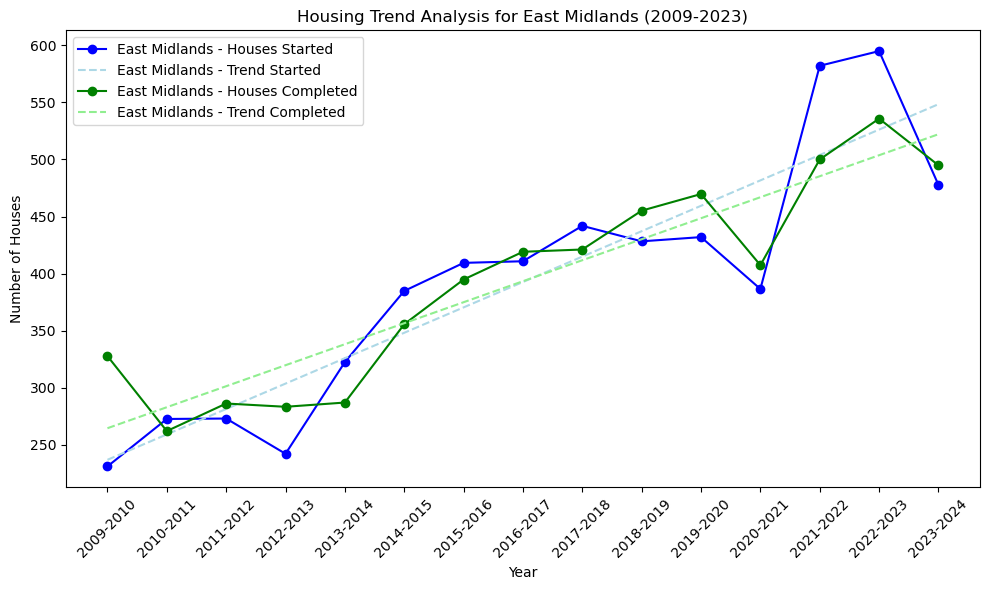

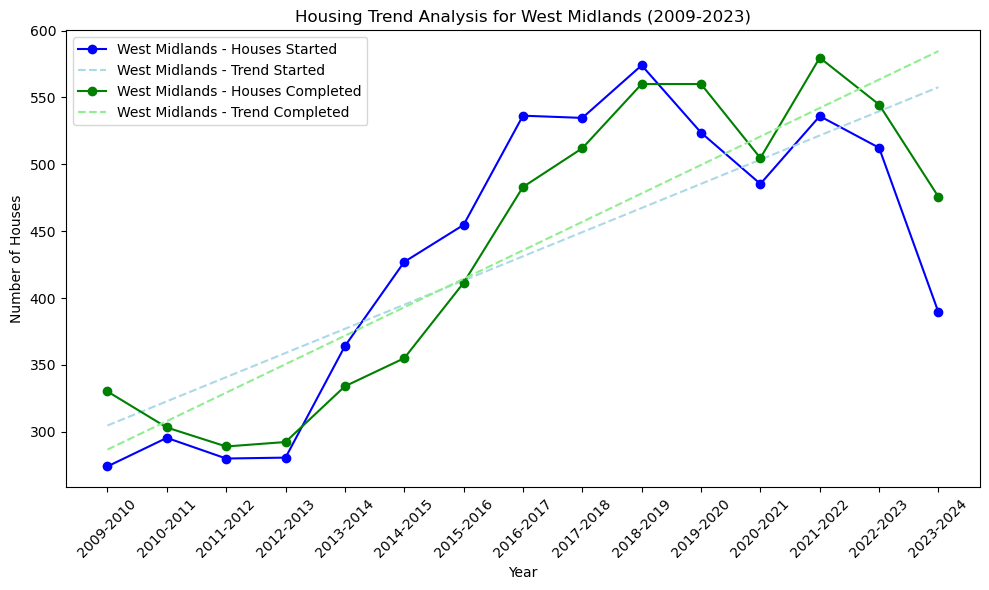

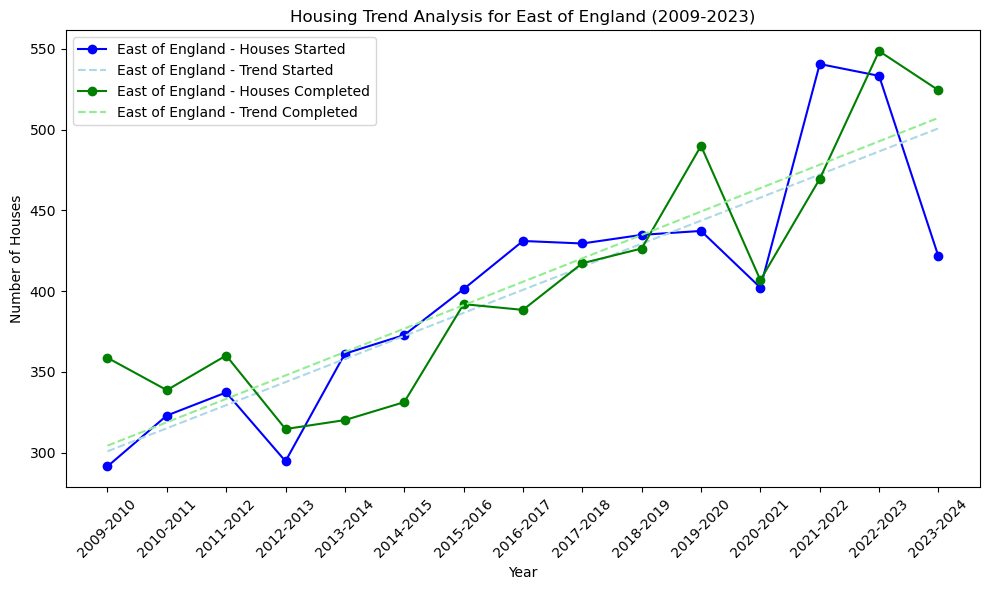

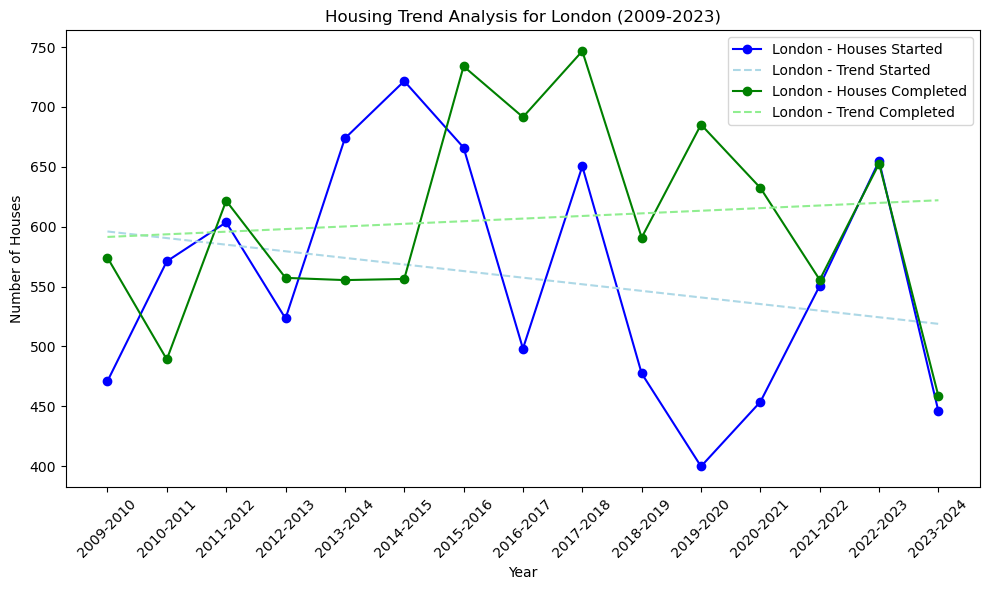

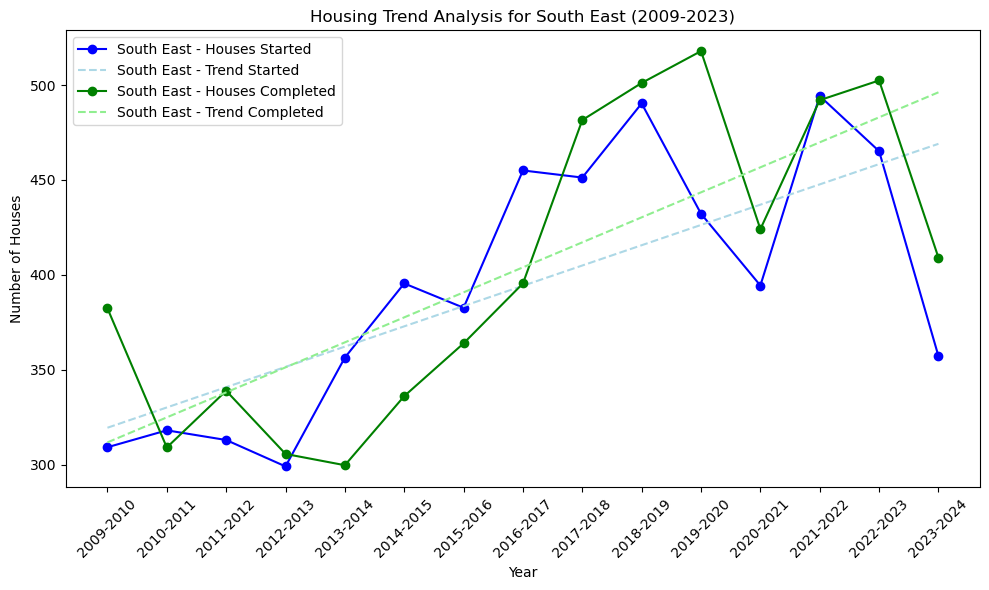

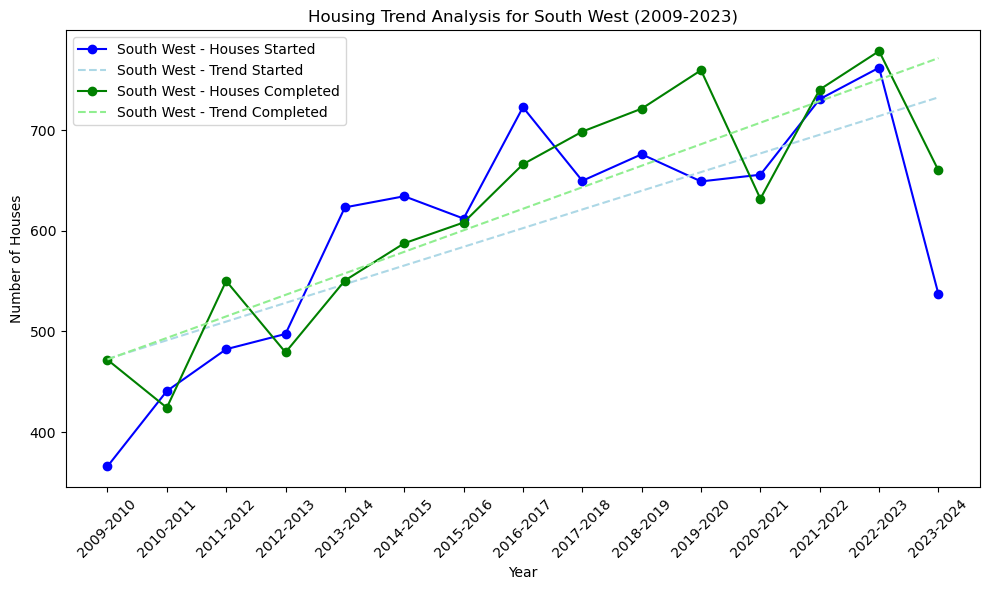

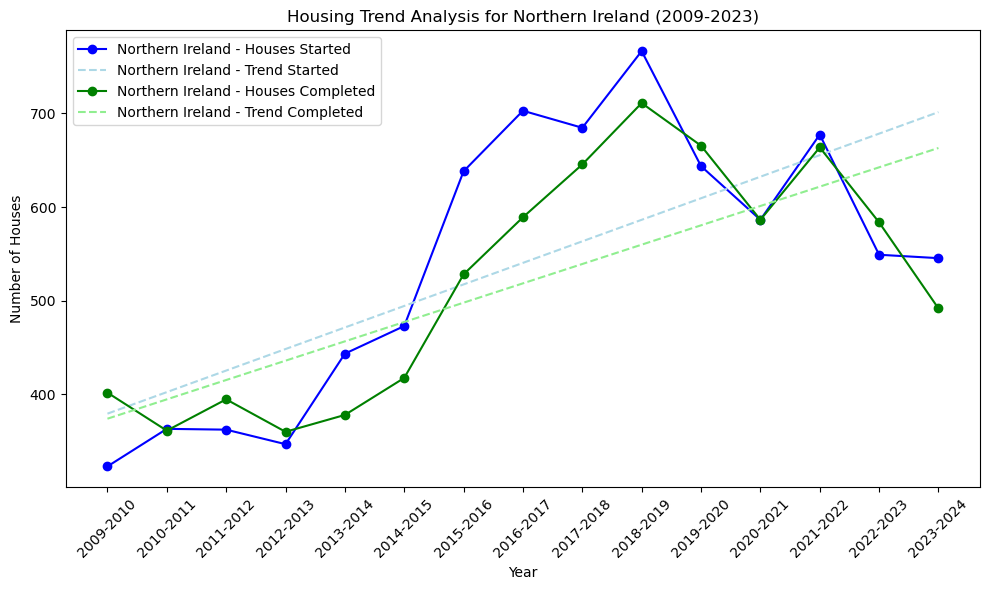

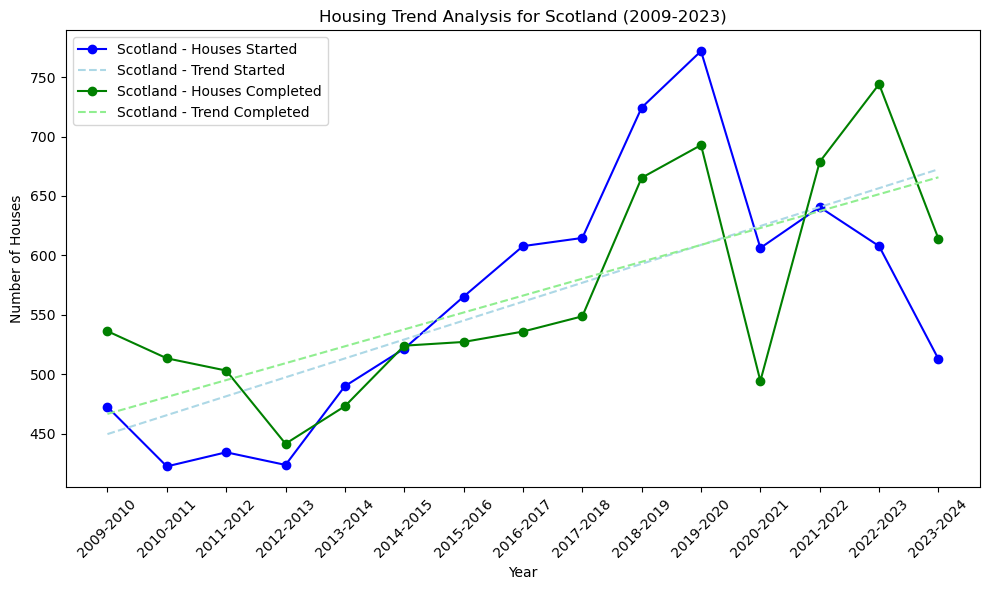

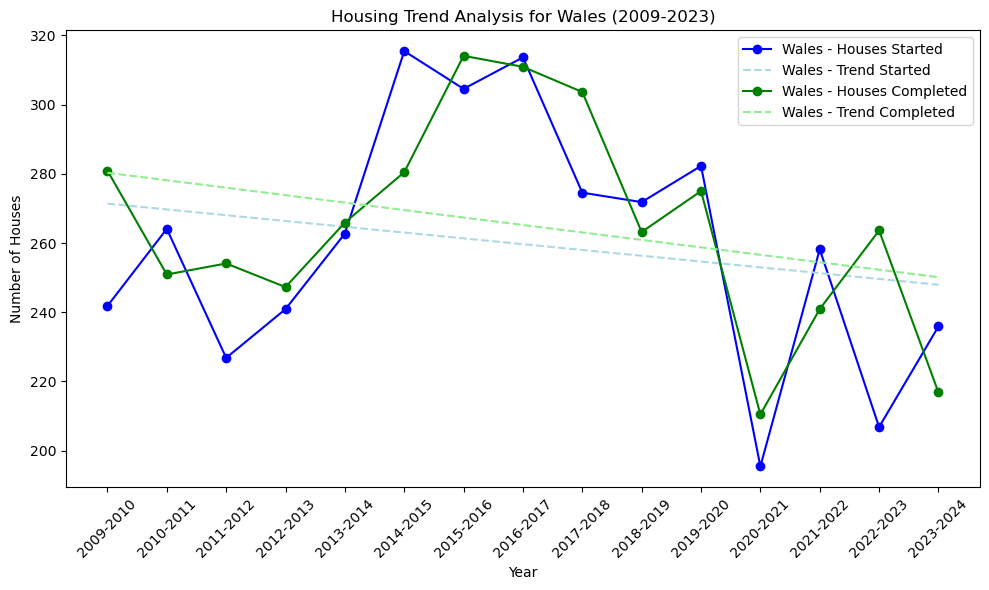

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def trend_analysis_by_region(completed_by_region, starts_by_region):
    """
    Function to perform trend analysis for each region based on houses started and completed data.

    Args:
    completed_by_region (DataFrame): DataFrame containing completed houses data by region and year.
    starts_by_region (DataFrame): DataFrame containing started houses data by region and year.

    Output:
    Plots the trend of average houses started and completed for each region with trend lines.
    """
    try:
        # Define the years (assuming the DataFrame index is years)
        years = np.array(list(range(completed_by_region.shape[0]))).reshape(-1, 1)
        year_labels = completed_by_region.index  # Assumes index is year labels

        # Create a dictionary to store trends for each region for plotting
        region_trends = {}
        
        for region in completed_by_region.columns:  # Iterate over each region
            # Extract data for the specific region
            avg_completed = completed_by_region[region].values.reshape(-1, 1)
            avg_started = starts_by_region[region].values.reshape(-1, 1)

            # Perform linear regression for housing starts
            model_started = LinearRegression().fit(years, avg_started)
            trend_started = model_started.predict(years)

            # Perform linear regression for housing completions
            model_completed = LinearRegression().fit(years, avg_completed)
            trend_completed = model_completed.predict(years)

            # Store data for this region
            region_trends[region] = {
                "years": year_labels,
                "avg_started": avg_started.flatten(),
                "trend_started": trend_started.flatten(),
                "avg_completed": avg_completed.flatten(),
                "trend_completed": trend_completed.flatten()
            }

        # Plot trends for each region
        for region, trends in region_trends.items():
            plt.figure(figsize=(10, 6))
            plt.plot(trends["years"], trends["avg_started"], label=f"{region} - Houses Started", marker='o', color='blue')
            plt.plot(trends["years"], trends["trend_started"], label=f"{region} - Trend Started", linestyle='--', color='lightblue')
            plt.plot(trends["years"], trends["avg_completed"], label=f"{region} - Houses Completed", marker='o', color='green')
            plt.plot(trends["years"], trends["trend_completed"], label=f"{region} - Trend Completed", linestyle='--', color='lightgreen')

            plt.xlabel("Year")
            plt.ylabel("Number of Houses")
            plt.title(f"Housing Trend Analysis for {region} (2009-2023)")
            plt.legend()
            plt.xticks(rotation=45)
            #plt.grid(True)
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Operation failed: {e}")

# Example usage
# Ensure `completed_by_region` and `starts_by_region` are DataFrames with years as the index and regions as columns.
trend_analysis_by_region(completed_by_region, starts_by_region)

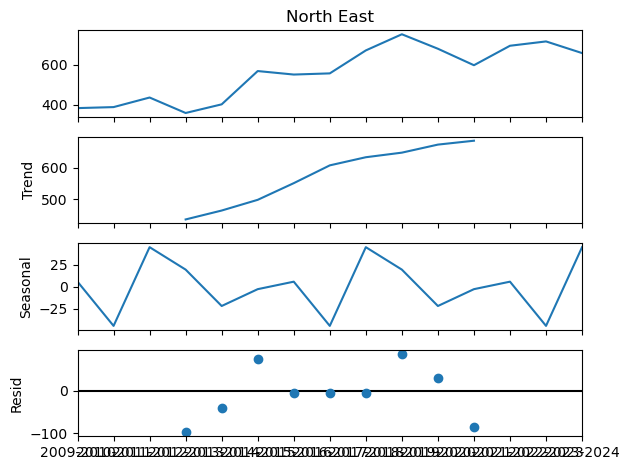

<Figure size 3000x600 with 0 Axes>

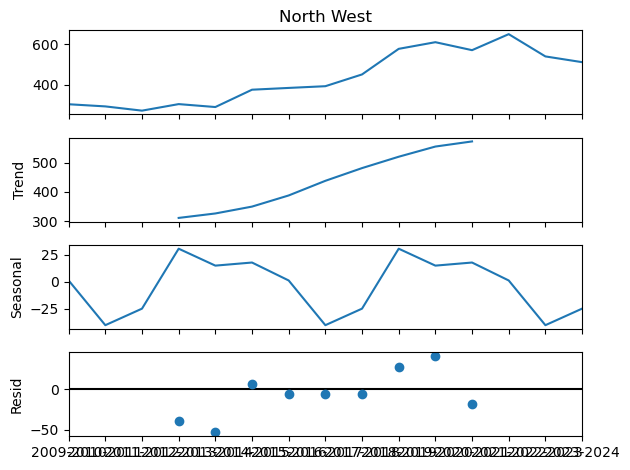

<Figure size 3000x600 with 0 Axes>

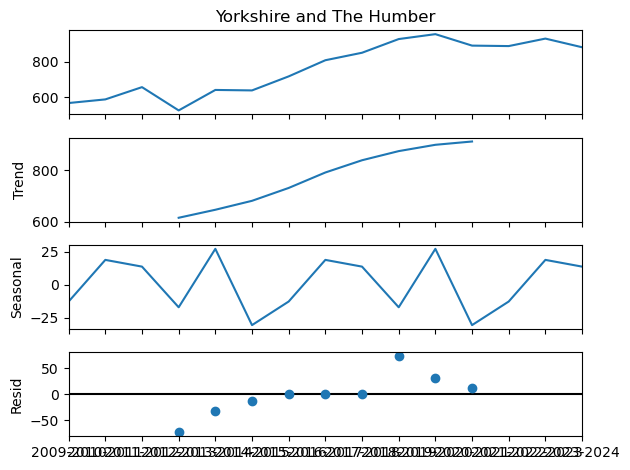

<Figure size 3000x600 with 0 Axes>

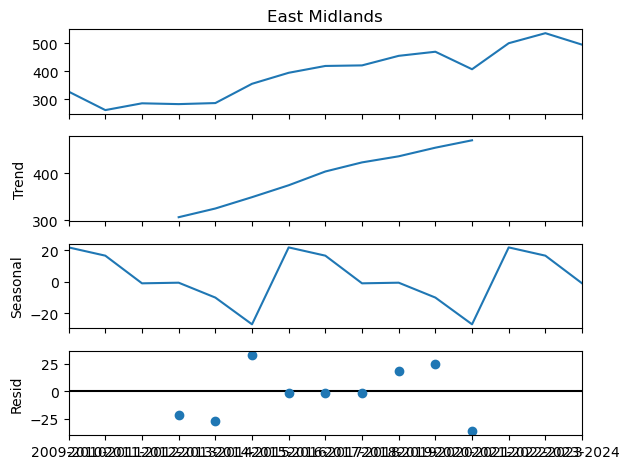

<Figure size 3000x600 with 0 Axes>

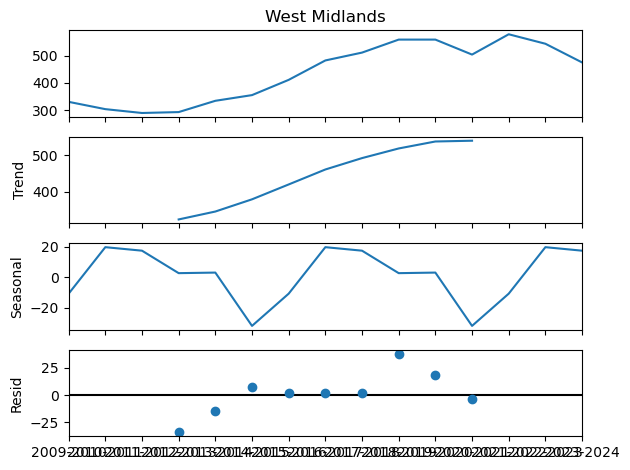

<Figure size 3000x600 with 0 Axes>

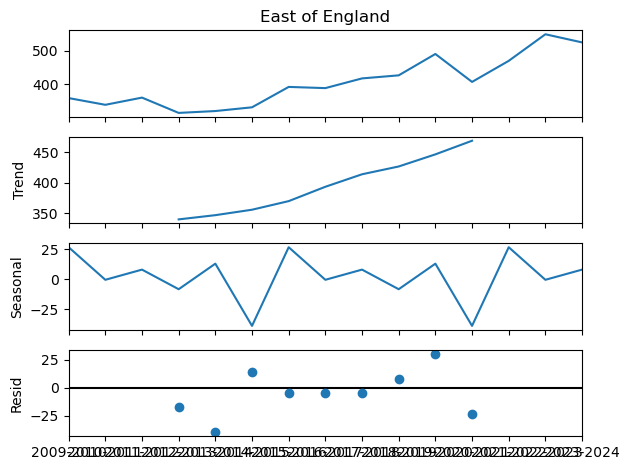

<Figure size 3000x600 with 0 Axes>

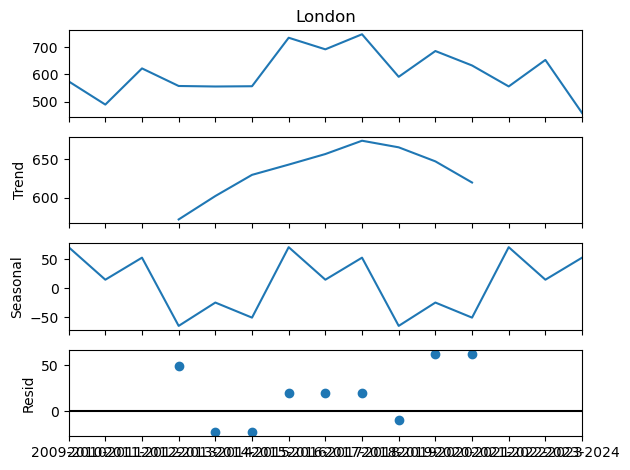

<Figure size 3000x600 with 0 Axes>

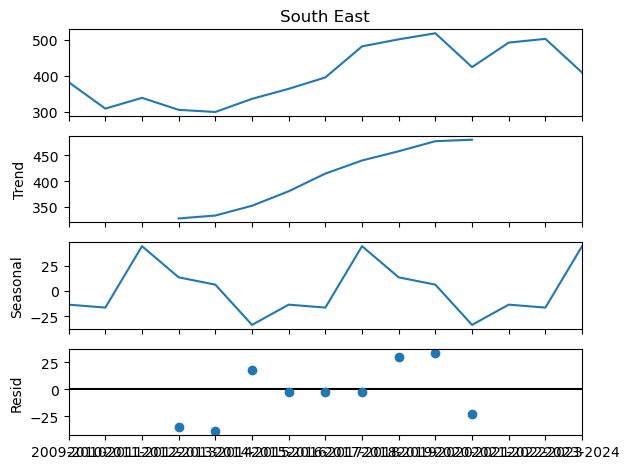

<Figure size 3000x600 with 0 Axes>

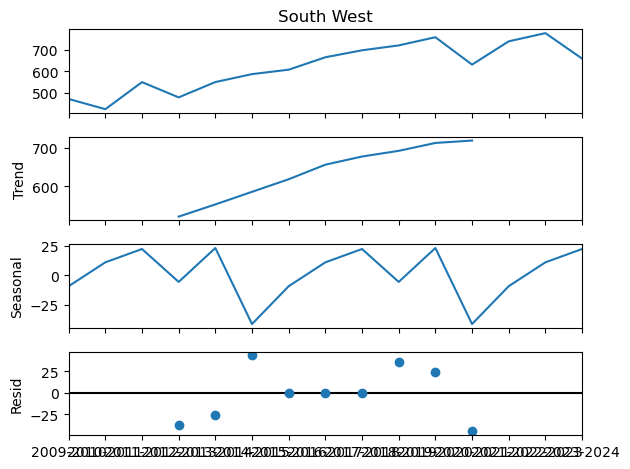

<Figure size 3000x600 with 0 Axes>

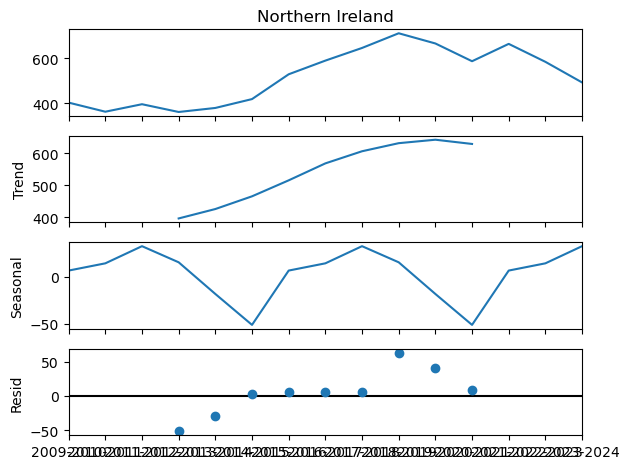

<Figure size 3000x600 with 0 Axes>

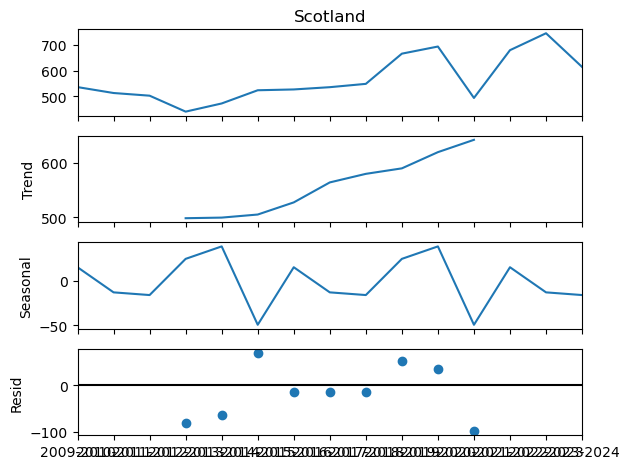

<Figure size 3000x600 with 0 Axes>

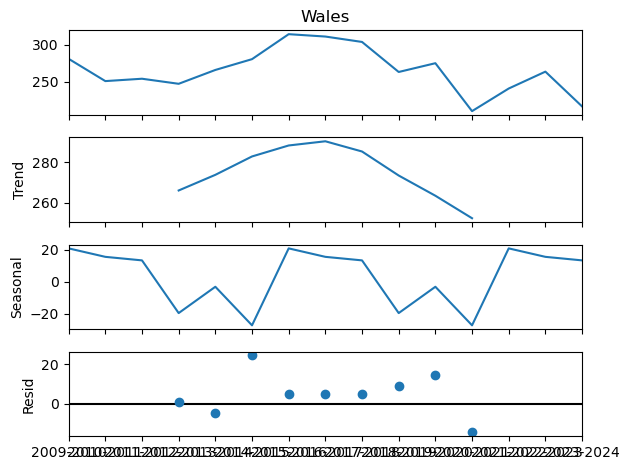

<Figure size 3000x600 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


def seasonality_analysis(completed_by_region, period):
    """
    Perform seasonality analysis using seasonal decomposition for each region.

    Args:
    completed_by_region (DataFrame): DataFrame containing completed houses data by region and year.
    period (int): The period for seasonality decomposition (default is 12 for yearly data).

    Output:
    Plots the trend, seasonality, and residuals for each region.
    """
    for region in completed_by_region.columns:
        try:
            # Perform seasonal decomposition for each region
            decomposition = seasonal_decompose(completed_by_region[region], model='additive', period=period)
            fig = decomposition.plot()
            #fig.suptitle(f"Seasonal Decomposition for {region}")
            plt.figure(figsize=(30, 6))
            plt.show()
        except Exception as e:
            print(f"Failed to decompose seasonality for {region}: {e}")

# Example usage
# Ensure `completed_by_region` is a DataFrame with years as the index and regions as columns.
seasonality_analysis(completed_by_region, period=6)


/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported ind

North East - MSE: 14285.51


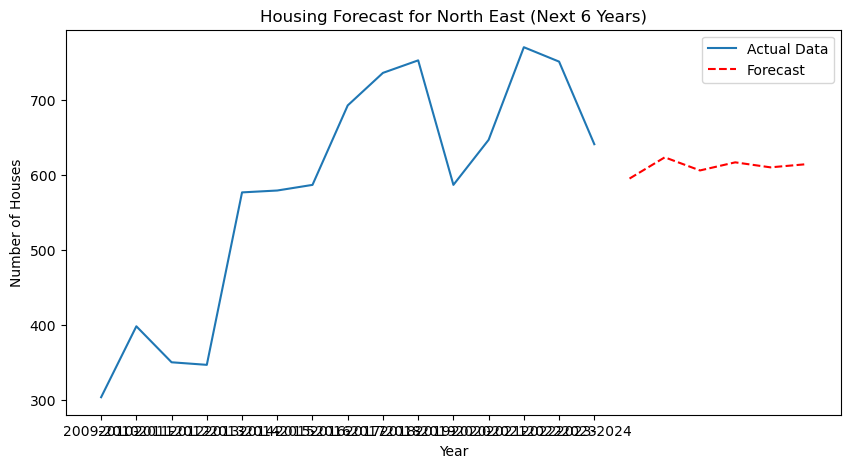

North West - MSE: 6161.50


/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: 

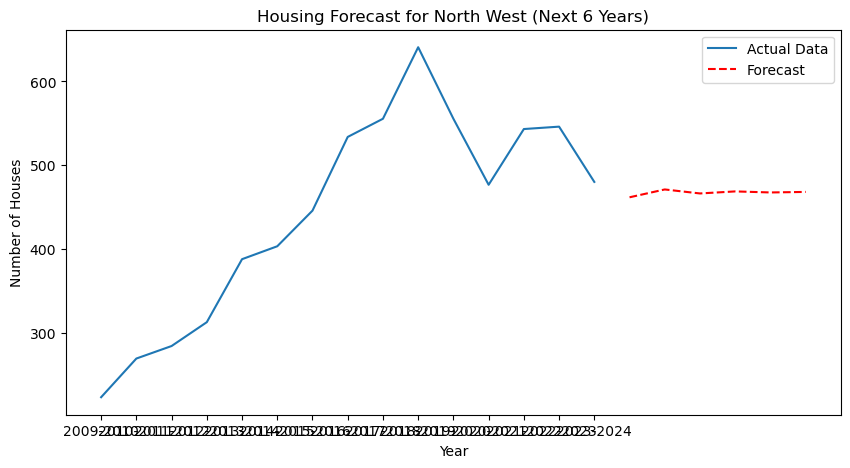

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported ind

Yorkshire and The Humber - MSE: 32513.24


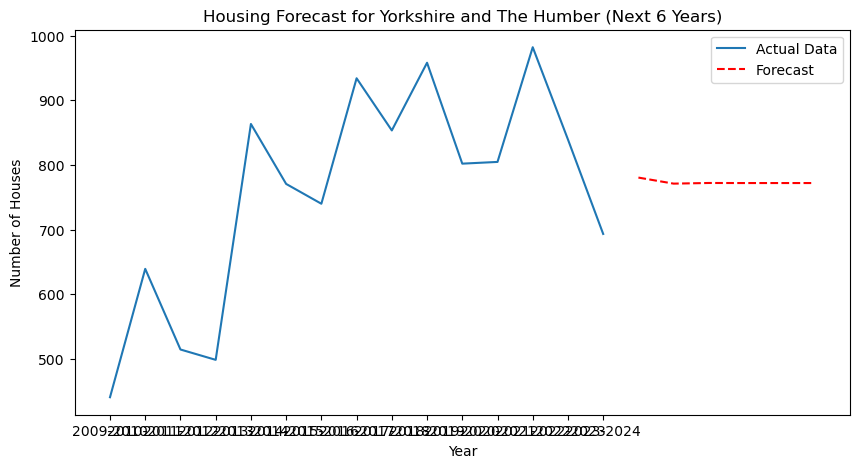

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported ind

East Midlands - MSE: 8000.45


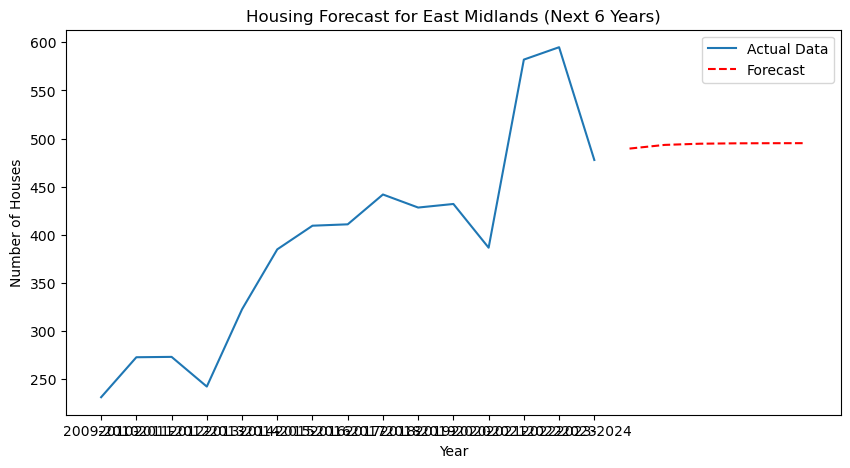

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported ind

West Midlands - MSE: 7582.58


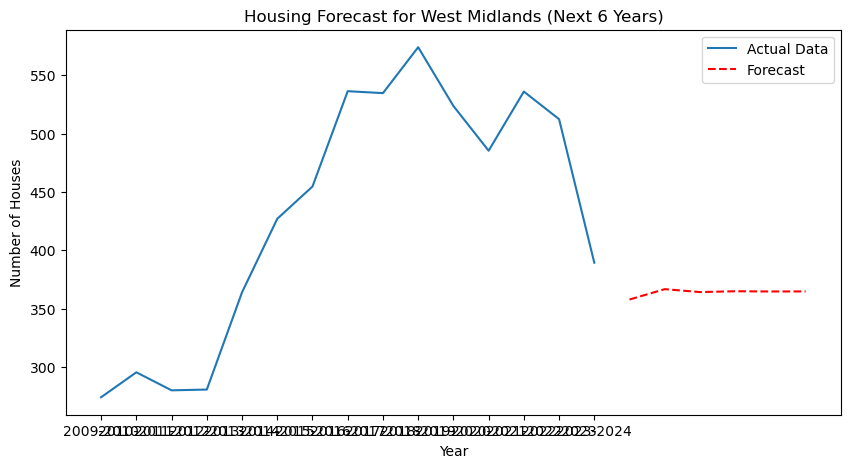

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported ind

East of England - MSE: 8231.66


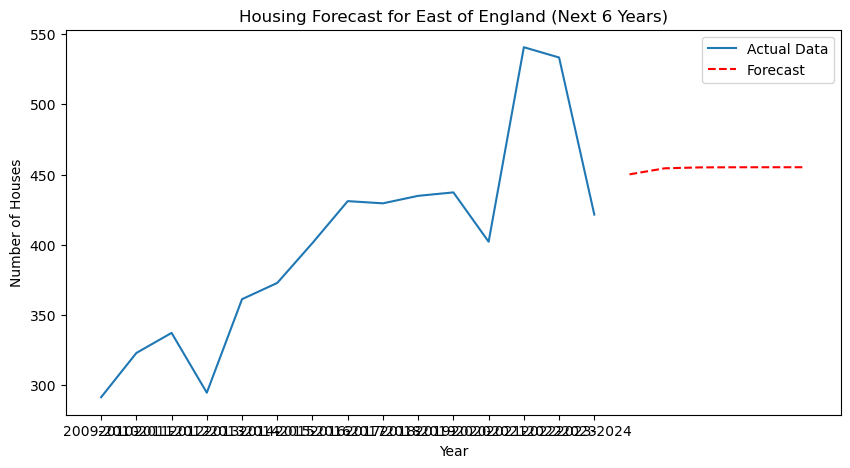

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported ind

London - MSE: 24931.17


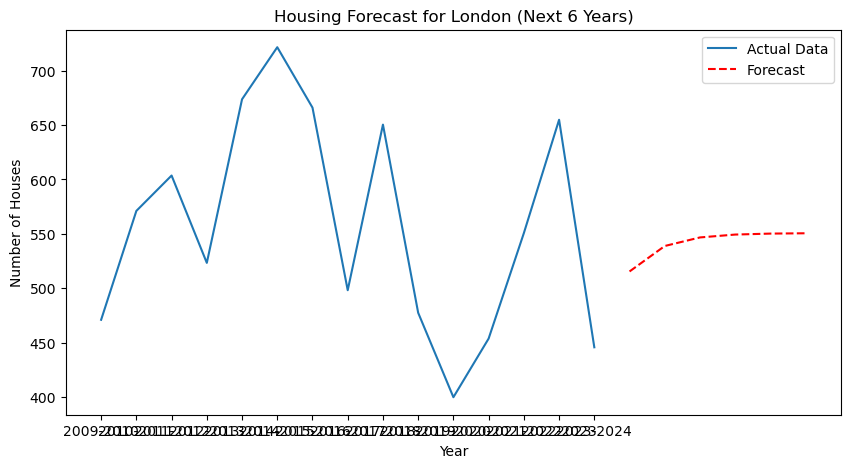

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported ind

South East - MSE: 8855.53


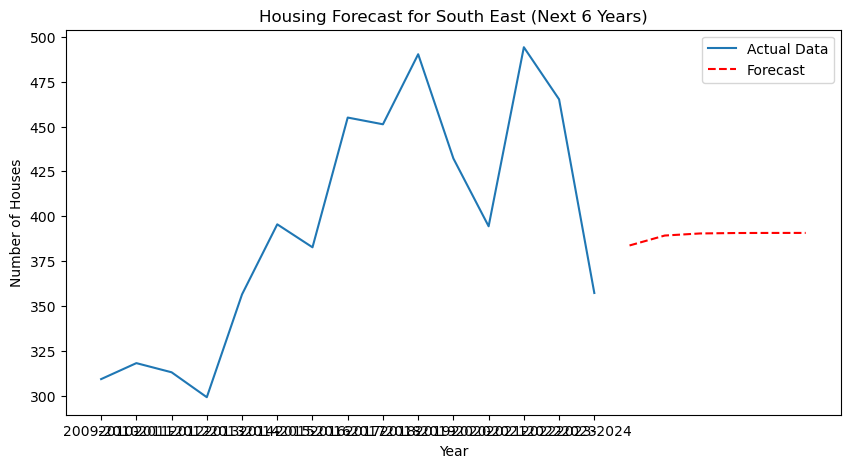

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported ind

South West - MSE: 15439.58


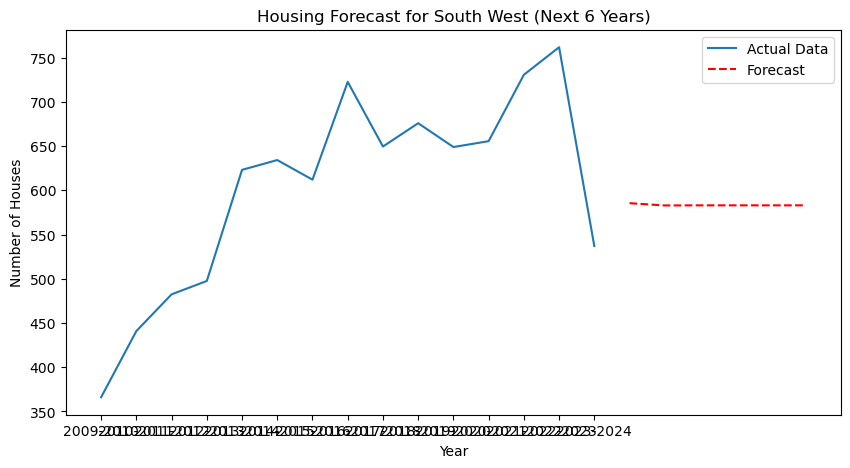

Northern Ireland - MSE: 13179.20


/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: 

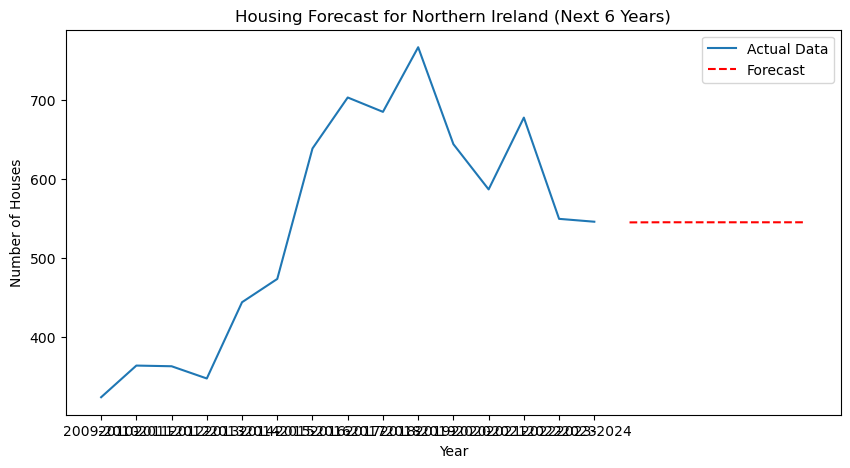

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: 

Scotland - MSE: 19207.65


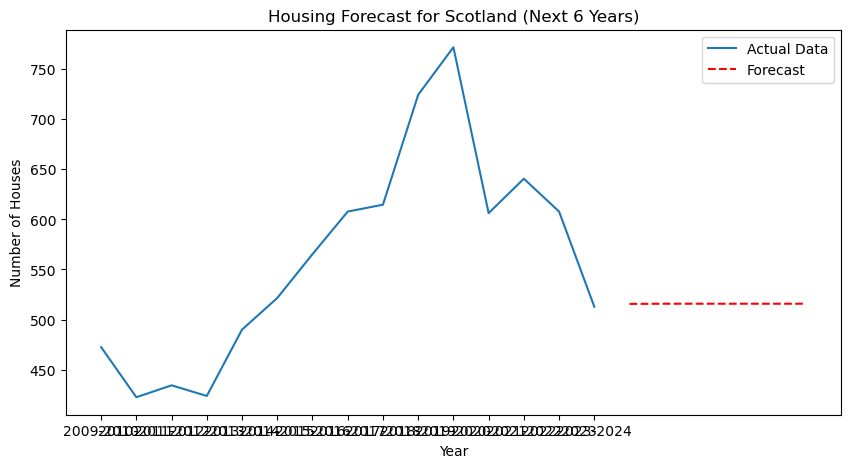

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported ind

Wales - MSE: 4915.64


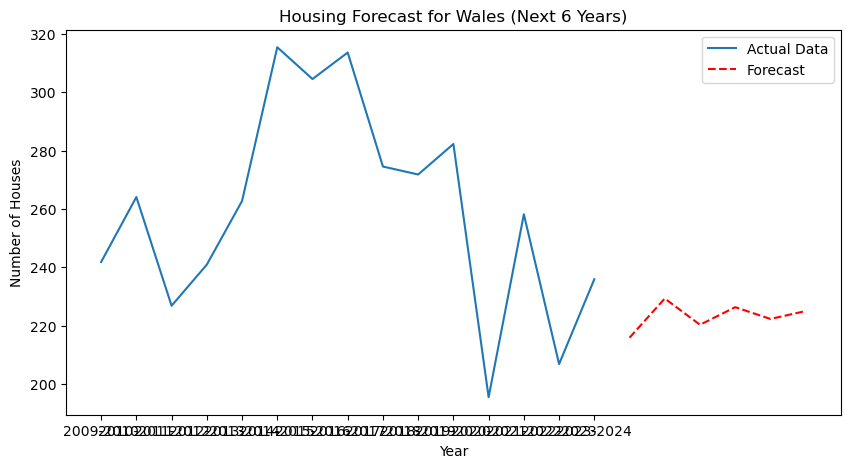

In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def forecast_housing_data(housing_data, periods):
    """
    Forecast housing data using ARIMA model for each region.

    Args:
    housing_data (DataFrame): DataFrame with housing data for each region (each column is a region).
    periods (int): Number of years to forecast into the future.

    Returns:
    forecast_results (dict): Dictionary with forecast results for each region.
    """
    forecast_results = {}

    for region in housing_data.columns:
        try:
            # Fit ARIMA model (adjust order as necessary)
            model = ARIMA(housing_data[region], order=(1, 1, 1))
            model_fit = model.fit()

            # Forecast future values
            forecast = model_fit.forecast(steps=periods)

            # Calculate MSE for the fitted model
            mse = mean_squared_error(housing_data[region].dropna(), model_fit.fittedvalues)
            print(f"{region} - MSE: {mse:.2f}")

            # Store forecast in results
            forecast_results[region] = forecast

            # Plot actual vs forecast
            plt.figure(figsize=(10, 5))
            plt.plot(housing_data.index, housing_data[region], label="Actual Data")
            plt.plot(forecast.index, forecast, label="Forecast", linestyle='--', color='red')
            plt.xlabel("Year")
            plt.ylabel("Number of Houses")
            plt.title(f"Housing Forecast for {region} (Next {periods} Years)")
            plt.legend()
            plt.show()

        except Exception as e:
            print(f"Operation failed for {region}: {e}")

    return forecast_results

# Example usage for starts or completions
forecast_housing_starts = forecast_housing_data(housing_data=starts_by_region, periods=6)
